<a href="https://colab.research.google.com/github/brunofbpaula/IA-FIAP/blob/main/Aula/Checkpoint_2_Classificadores_de_IA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

----------------------
## Checkpoint - Diagnóstico Industrial: Classificador para Falha do Compressor.


In [ ]:
#Preencha Nome Completo e RM's dos integrantes
# Bruno Francisco Brito de Paula - 552226
# Kayque Lima - 550732
# Gabriel França - 551905
# Edward de Lima Silva - 98676

----------------------
Esse dataset contém dados dos sensores acústicos para coletar o funcionamento do compressor, sendo eles: Saudáveis, Problema no Rolamento e Problema na Volante. As coletas de dados podem ser exemplificadas na Fig.1.

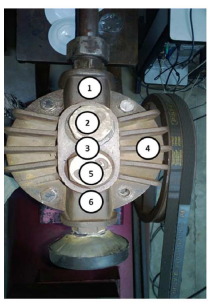

Fig.1 - Posicionamentos dos sensores para coleta de dados.
Fonte:(https://www.iitk.ac.in/idea/datasets/)

Será disponibilizado as 224 coletas de cada diagnóstico, em uma pasta separada. Porém a equipe pode utilizar, os arquivos .csv disponibilizados também.

# (4 pontos) 1- Leitura, Pré-processamento dos dados, Organização das entradas e saídas. a





In [1]:
from google.colab import drive
drive.mount('/content/drive/', force_remount = True)

Mounted at /content/drive/


In [2]:
# from sklearn.impute import SimpleImputer
# import numpy as np
# import pandas as pd

# imputer = SimpleImputer(strategy='mean')

# valor_de_leitura = 5

# normal = []
# volante = []
# rolamento = []
# for i in range(valor_de_leitura):
#     n = pd.read_csv(f'/content/drive/MyDrive/Checkpoint AI/X.csv', sep=',', header=None)
#     n_array = np.asarray(n)
#     n_array_transposed = n_array.T
#     normal_fit = imputer.fit_transform(n_array_transposed).reshape([-1])
#     normal.append(normal_fit)
#     v = pd.read_csv(f'/content/drive/MyDrive/Checkpoint AI/volante/preprocess_Reading1{i+1}.dat', sep=',', header=None)
#     # Aqui você pode fazer algo com os dados 'v' dos arquivos CSV de volante, se necessário

In [3]:
import pandas as pd
#Carregar o arquivo .csv
X = pd.read_csv('/content/drive/MyDrive/Checkpoint AI/X.csv', sep=',')
X = X.drop(columns= X.columns[0])
X = X.drop(X.index[0])

In [108]:
import numpy as np

# Array
X = np.asarray(X)

# Seções
funcionamento_normal = X[:,:49999]
problema_rolamento = X[:,50000:99999]
problema_volante = X[:,100000:149999]

In [109]:
print(f'{X.shape}')
print(f'{funcionamento_normal.shape}')
print(f'{problema_rolamento.shape}')
print(f'{problema_volante.shape}')

(223, 150000)
(223, 49999)
(223, 49999)
(223, 49999)


In [127]:
# Criar o DataFrame
df_normal = pd.DataFrame(funcionamento_normal)
df_rolamento = pd.DataFrame(problema_rolamento)
df_volante = pd.DataFrame(problema_volante)

# Input
x = pd.concat([df_normal, df_rolamento])
x = pd.concat([x, df_volante])

In [131]:
x

,0,1,2,3,4,5,6,7,8,9,...,49989,49990,49991,49992,49993,49994,49995,49996,49997,49998
0,0.708120,0.672780,0.558330,0.397800,0.144840,-0.100270,-0.248010,-0.264770,-0.187730,-0.099230,...,0.298730,0.231300,0.140320,0.058381,0.009453,0.001167,0.023518,0.053540,0.067537,0.081501
1,-0.645920,-0.536520,-0.451400,-0.262580,-0.091089,0.025412,0.080004,0.086338,0.058000,0.007402,...,0.340440,0.312500,0.225820,0.119780,0.058308,0.100390,0.251550,0.443040,0.573540,0.671900
2,0.002060,0.089332,0.150260,0.236590,0.264990,0.210810,0.093819,-0.028642,-0.101800,-0.110870,...,-0.258420,-0.369540,-0.431400,-0.442080,-0.411330,-0.356890,-0.300210,-0.261400,-0.251850,-0.242620
3,0.221340,0.207740,0.188110,0.156610,0.130620,0.124310,0.141750,0.173620,0.199860,0.195330,...,-0.124520,-0.103950,-0.060195,0.001982,0.064904,0.106770,0.119520,0.105410,0.063017,0.037614
4,0.250130,0.214060,0.188370,0.148050,0.129570,0.130930,0.142380,0.151640,0.148430,0.129720,...,1.049800,1.130500,1.168200,1.162500,1.130300,1.087000,1.029800,0.946130,0.834270,0.782270
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218,-0.215870,-0.208750,-0.202380,-0.188340,-0.173280,-0.163290,-0.163560,-0.174890,-0.194500,-0.217350,...,-0.114850,-0.027902,0.052149,0.113590,0.154330,0.181620,0.205830,0.233710,0.265950,0.283750
219,-0.485280,-0.474880,-0.454570,-0.412830,-0.326650,-0.203800,-0.056702,0.099362,0.239150,0.329940,...,0.014953,0.043429,0.057588,0.055563,0.048183,0.050908,0.069649,0.100860,0.142250,0.166520
220,-0.234430,-0.167250,-0.111770,-0.032928,0.013426,0.010098,-0.034994,-0.095571,-0.141020,-0.151350,...,-0.008166,-0.010576,-0.014606,-0.015487,-0.005582,0.022512,0.064142,0.096737,0.095403,0.090310
221,0.001746,0.001731,0.001688,0.001579,0.001415,0.001326,0.001585,0.002432,0.003751,0.004924,...,0.081819,0.109710,0.038565,-0.094680,-0.224960,-0.292550,-0.269570,-0.168320,-0.032219,0.060065


In [128]:
#Criar as Saídas para cada DataFrame
y_normal = pd.DataFrame(['Normal' for col in range(len(df_normal))])
y_rolamento = pd.DataFrame(['Rolamento' for col in range(len(df_rolamento))])
y_volante = pd.DataFrame(['Volante' for col in range(len(df_volante))])

y = pd.concat([y_normal, y_rolamento])
y = pd.concat([y, y_volante])
y = y.assign(Class = y)
y = y['Class']

In [129]:
# Output
y

0       Normal
1       Normal
2       Normal
3       Normal
4       Normal
        ...   
218    Volante
219    Volante
220    Volante
221    Volante
222    Volante
Name: Class, Length: 669, dtype: object

# (4 pontos) 2 - Modelo(s) selecionado para a classificação e Treinamento do Modelo

In [163]:
from sklearn.model_selection import train_test_split

# Dividindo conjunto de treinamento e conjunto de teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

In [164]:
# Input
x_train.head(5)

,0,1,2,3,4,5,6,7,8,9,...,49989,49990,49991,49992,49993,49994,49995,49996,49997,49998
23,-0.195370,-0.210200,-0.228440,-0.288770,-0.360360,-0.446760,-0.540210,-0.616410,-0.651010,-0.642320,...,-0.131780,-0.114310,-0.095357,-0.085638,-0.099089,-0.146850,-0.222380,-0.298050,-0.343230,-0.374730
26,-0.032726,-0.050543,-0.052543,-0.063679,-0.033477,0.025592,0.093944,0.150850,0.175340,0.148640,...,0.012936,0.019030,-0.008175,-0.065843,-0.143190,-0.225560,-0.295880,-0.340640,-0.355500,-0.379830
134,0.067134,0.103650,0.135260,0.198840,0.244930,0.276070,0.292360,0.293800,0.284030,0.272170,...,-0.074890,-0.047158,-0.025928,-0.017186,-0.020274,-0.029410,-0.037729,-0.040963,-0.038877,-0.034673
213,-0.004930,-0.005079,-0.005531,-0.006901,-0.009716,-0.013871,-0.017789,-0.018669,-0.014322,-0.005135,...,0.060834,0.117350,0.135540,0.096297,0.025001,-0.026661,-0.015277,0.069350,0.197090,0.290870
37,0.070354,0.052904,0.038613,0.010985,-0.016793,-0.041531,-0.062617,-0.080331,-0.092222,-0.094080,...,0.101100,0.086414,0.067338,0.045602,0.021852,-0.000975,-0.018125,-0.028109,-0.034033,-0.038960


In [165]:
# Output
y_train.head(5)

23        Normal
26     Rolamento
134    Rolamento
213       Normal
37     Rolamento
Name: Class, dtype: object

In [166]:
# Treinamento
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Classificador
lda = LinearDiscriminantAnalysis()
lda.fit(x_train,y_train)

LinearDiscriminantAnalysis()

In [167]:
# Forecasting
y_forecast = lda.predict(x_test)
y_forecast[:15]

array(['Normal', 'Normal', 'Volante', 'Normal', 'Rolamento', 'Volante',
       'Rolamento', 'Volante', 'Rolamento', 'Rolamento', 'Normal',
       'Rolamento', 'Volante', 'Normal', 'Normal'], dtype='<U9')

# (1 Ponto) 3 - Verificação do Modelo treinado e Análise das Métricas (Matriz de Confusão, Precisão, Recall, Acurácia e F1 Score)

<Figure size 1500x500 with 0 Axes>

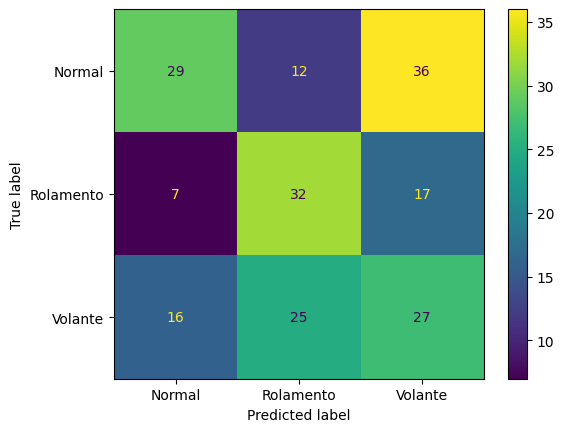

In [168]:
# Matriz de Confusão
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, classification_report

labels_df = ['Normal','Rolamento', 'Volante']

# Função
matrix = confusion_matrix(y_true = y_test,
                                   y_pred = y_forecast,
                                   labels=labels_df)

# Plot
import matplotlib.pyplot as plt

figure = plt.figure(figsize=(15, 5))
display = ConfusionMatrixDisplay(confusion_matrix = matrix, display_labels=labels_df)
display.plot(values_format='d')

In [169]:
# Accuracy, Precision Score, Recall, F1 Score
accuracy = accuracy_score(y_true = y_test, y_pred = y_forecast)

p_score = precision_score(y_true = y_test,
                      y_pred = y_forecast,
                      average='micro')

r_score = recall_score(y_true = y_test,
         y_pred = y_forecast,
         average='micro')

print(f'Accuracy: {accuracy},\nPrecision Score: {p_score},\nRecall Score: {r_score}\n')
print('-'*20 +'[Relatório completo]'.upper() + '-'*20 + '\n')
print(classification_report(y_test, y_forecast))
print('-'*60)

Accuracy: 0.43781094527363185,
Precision Score: 0.43781094527363185,
Recall Score: 0.43781094527363185

--------------------[RELATÓRIO COMPLETO]--------------------

              precision    recall  f1-score   support

      Normal       0.56      0.38      0.45        77
   Rolamento       0.46      0.57      0.51        56
     Volante       0.34      0.40      0.36        68

    accuracy                           0.44       201
   macro avg       0.45      0.45      0.44       201
weighted avg       0.46      0.44      0.44       201

------------------------------------------------------------


Basicamente, o modelo é muito ruim.

# (1 Ponto) 4 - Verificação da Qualidade dos dados, Calcule a métrica de Kappa Cohen e a Curva de ROC

In [ ]:
# Cohen's Kappa
from sklearn.metrics import cohen_kappa_score

k = cohen_kappa_score(y1, y2, *, labels=None, weights=None, sample_weight=None)

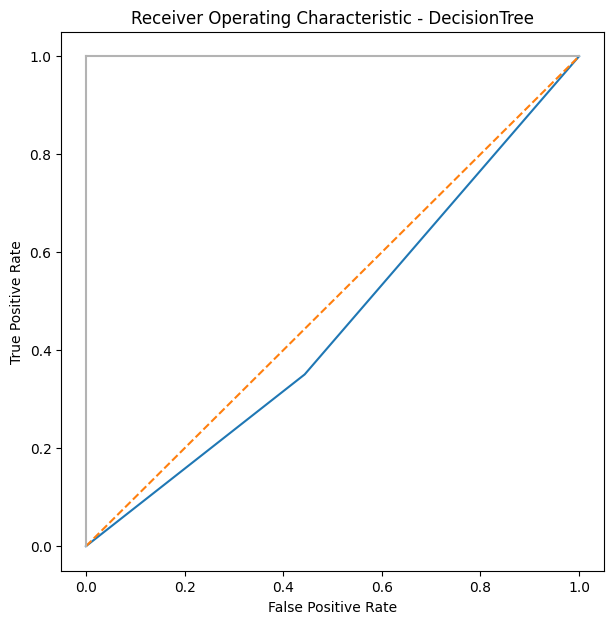

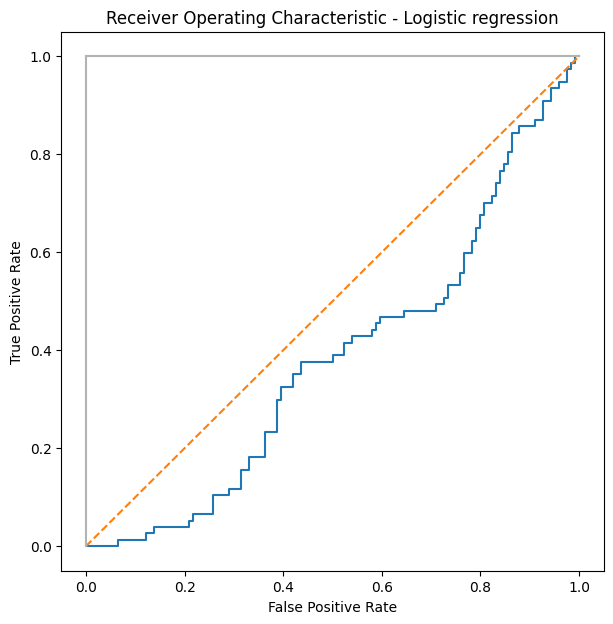

In [178]:
# Curva de ROC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score

# Treinando classifier
clf_tree = DecisionTreeClassifier();
clf_reg = LogisticRegression();

clf_tree.fit(x_train, y_train);
clf_reg.fit(x_train, y_train);

# Usando modelos no dataset
y_score1 = clf_tree.predict_proba(x_test)[:,1]
y_score2 = clf_reg.predict_proba(x_test)[:,1]

# Criando porcentagem de Falses e Trues Positive

# A curva ROC só funciona para soft predictions, portanto, será plotada
# apenas a probabilidade prevista de uma das classes.

false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, y_score1, pos_label='Normal')
false_positive_rate2, true_positive_rate2, threshold2 = roc_curve(y_test, y_score2, pos_label='Normal')

# Plotando curva
plt.subplots(1, figsize=(7,7))
plt.title('Receiver Operating Characteristic - DecisionTree')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

plt.subplots(1, figsize=(7,7))
plt.title('Receiver Operating Characteristic - Logistic regression')
plt.plot(false_positive_rate2, true_positive_rate2)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()